In [2]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten, MaxPooling2D, PreprocessingLayer, Dropout

# Project 2 - Veggie Classification

### Download and Unzip Data

In [3]:
!pip install wget


In [4]:
def bar_custom(current, total, width=80):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))
import wget
import zipfile
zip_name = "train.zip"

url = "https://jrssbcrsefilesnait.blob.core.windows.net/3950data1/vegetable_image_dataset.zip"

if not os.path.exists(zip_name):
    wget.download(url, zip_name, bar=bar_custom)

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
# Generate Datasets - you can change this if desired
# ENSURE FILE PATHS MATCH CORRECTLY
IMAGE_SIZE=(224,224)
train_dir='Vegetable Images/train'
val_dir='Vegetable Images/validation'
batch_size = 16

# Load training data
train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size = batch_size,
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [6]:
def show_img(data, labels, names, index):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[index])
    plt.xlabel(names[labels[index][0]]) #The CIFAR labels happen to be arrays, so we need the extra index
    plt.show()

# Helper to plot loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_acc(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

## Data Preparation

In [7]:
# Split X and y 
X_train, y_train = [], []
X_val, y_val = [], []

for images, labels in train_ds:
    X_train.append(images.numpy())  
    y_train.append(labels.numpy())
# put the numpy array 
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

for images, labels in val_ds:
    X_val.append(images.numpy())  
    y_val.append(labels.numpy())


X_val = np.concatenate(X_val)
y_val = np.concatenate(y_val)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (15000, 224, 224, 3)
y_train shape: (15000, 15)
X_val shape: (3000, 224, 224, 3)
y_val shape: (3000, 15)


In [19]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation="softmax"))


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 16384)             0         
                                                                 
 dense_12 (Dense)            (None, 64)                1048640   
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 1,051,082
Trainable params: 1,051,082
Non-trainable params: 0
____________________________________________

## Custom Model Training

In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix

BASE_EPOCHS = 10
BATCH_SIZE = 32
IMAGE_SIZE = (32, 32)  
# Resize to fit the shape 
X_train_resized = tf.image.resize(X_train, size=IMAGE_SIZE)
X_test_resized = tf.image.resize(X_val, size=IMAGE_SIZE)

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(15, activation="softmax"))

metric_list = ['accuracy']
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=metric_list)

# Train the model
train_log = model.fit(X_train_resized, y_train, epochs=BASE_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.3, verbose=1)

train_eval = model.evaluate(X_train_resized, y_train)
test_eval = model.evaluate(X_test_resized, y_val, verbose=2)




Epoch 1/10
329/329 [==============================] - 15s 44ms/step - loss: 12.1674 - accuracy: 0.3202 - val_loss: 1.6077 - val_accuracy: 0.4778
Epoch 2/10
329/329 [==============================] - 14s 42ms/step - loss: 1.2017 - accuracy: 0.6257 - val_loss: 1.2659 - val_accuracy: 0.6358
Epoch 3/10
329/329 [==============================] - 14s 42ms/step - loss: 0.6527 - accuracy: 0.8054 - val_loss: 1.1007 - val_accuracy: 0.6973
Epoch 4/10
329/329 [==============================] - 12s 37ms/step - loss: 0.4164 - accuracy: 0.8749 - val_loss: 1.0684 - val_accuracy: 0.7236
Epoch 5/10
329/329 [==============================] - 12s 36ms/step - loss: 0.2998 - accuracy: 0.9139 - val_loss: 1.1193 - val_accuracy: 0.7322
Epoch 6/10
329/329 [==============================] - 11s 34ms/step - loss: 0.2346 - accuracy: 0.9335 - val_loss: 1.2411 - val_accuracy: 0.7404
Epoch 7/10
329/329 [==============================] - 11s 34ms/step - loss: 0.1848 - accuracy: 0.9468 - val_loss: 1.3249 - val_accuracy

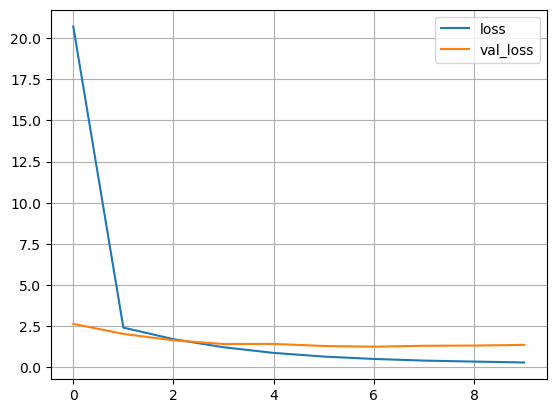

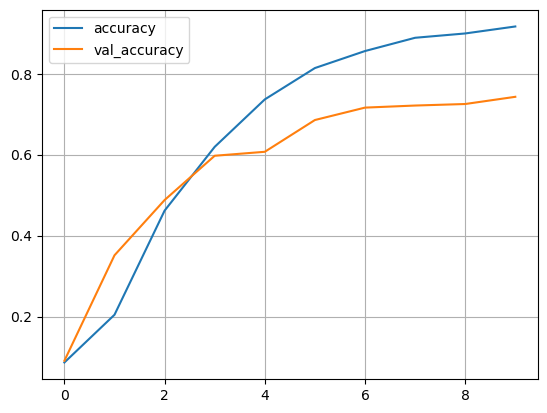

In [11]:
plot_loss(train_log)
plot_acc(train_log)

## Transfer Learning Model

## Test Best Models and Illustrate Results

In [12]:
test_dir='Vegetable Images/test'
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size = batch_size,
)

Found 3000 files belonging to 15 classes.


In [23]:
test_loss, test_accuracy = model.evaluate(test_ds)
print('Test accuracy:', test_accuracy)
predictions = model.predict(test_ds)

188/188 [==============================] - 6s 32ms/step - loss: 1.5590 - accuracy: 0.7387
Test accuracy: 0.7386666536331177
188/188 [==============================] - 5s 27ms/step


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

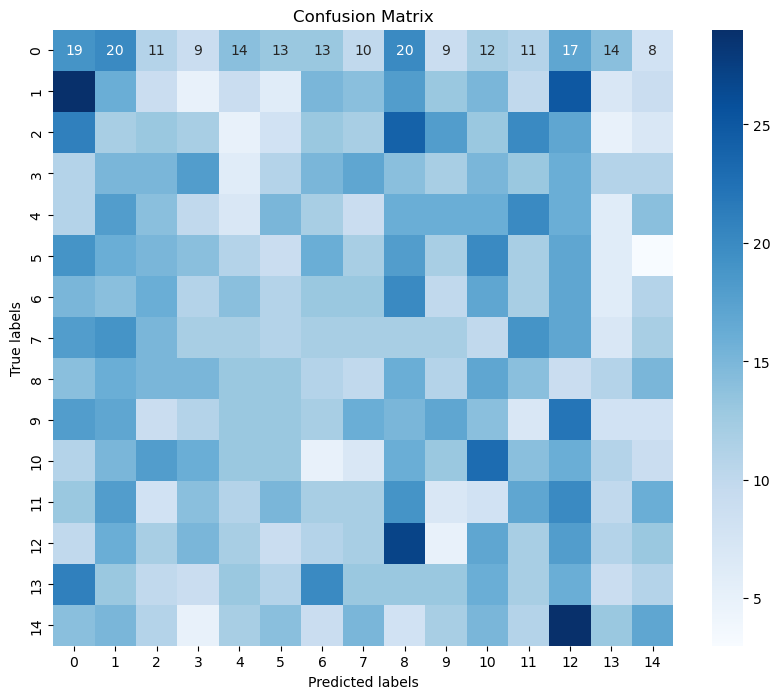

              precision    recall  f1-score   support

           0       0.08      0.10      0.09       200
           1       0.07      0.08      0.07       200
           2       0.07      0.07      0.07       200
           3       0.10      0.09      0.10       200
           4       0.04      0.04      0.04       200
           5       0.05      0.04      0.05       200
           6       0.07      0.07      0.07       200
           7       0.07      0.06      0.06       200
           8       0.06      0.08      0.07       200
           9       0.09      0.09      0.09       200
          10       0.10      0.12      0.11       200
          11       0.08      0.09      0.08       200
          12       0.07      0.09      0.08       200
          13       0.07      0.04      0.05       200
          14       0.10      0.09      0.09       200

    accuracy                           0.07      3000
   macro avg       0.07      0.07      0.07      3000
weighted avg       0.07   

In [26]:
# Create classes
predicted_classes = np.argmax(predictions, axis=1)
true_labels = []
for images, labels in test_ds:
    true_labels.extend(np.argmax(labels, axis=1))

# Plot confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_labels, predicted_classes))